In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'   
df1 = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
#a=np.loadtxt(url,dtype=object)
df2 = pd.read_csv(url)

1) Посмотрим на зависимость времени задержки рейса от скорости ветра (самому всегда казалось, что это 1 из основных факторов)

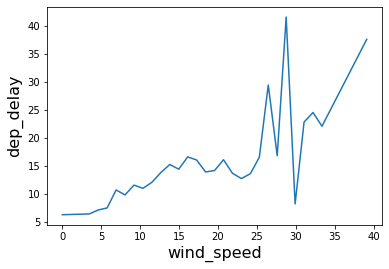

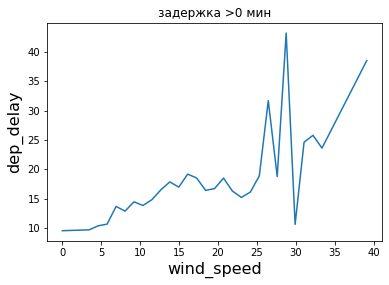

In [293]:
d1=df1.dropna()
#print(d1.shape)
r=np.arange(len(d1))
d1.index=r
d2=df2.dropna()
r=np.arange(len(d2))
d2.index=r
d=pd.merge(d1,d2,on=['year','day','hour','month'])
d['1']=np.ones(len(d['year']))
#print(d.head)
c = np.sort(d['wind_speed'].unique()[np.logical_not(np.isnan(d['wind_speed'].unique()))])
c=np.delete(c,np.where(c>100))
#print(c)
dd=d.drop(d[d.wind_speed >100].index)
ddd=dd.groupby('wind_speed')['1'].sum()
b=dd.groupby('wind_speed')['dep_delay'].mean()
#print(b)
plt.plot(c,b)
plt.xlabel('wind_speed',fontsize=16)
plt.ylabel('dep_delay',fontsize=16)
plt.show()

dd=dd.drop(dd[dd.dep_delay < 0].index)
c = np.sort(dd['wind_speed'].unique()[np.logical_not(np.isnan(dd['wind_speed'].unique()))])
b=dd.groupby('wind_speed')['dep_delay'].sum()/ddd
#print(b)
plt.plot(c,b)
plt.title('задержка >0 мин')
plt.xlabel('wind_speed',fontsize=16)
plt.ylabel('dep_delay',fontsize=16)
plt.show()

Как-то ожидал я совсем не этого...(

2)Аналогичная зависимость но уже от скорости порывов ветра

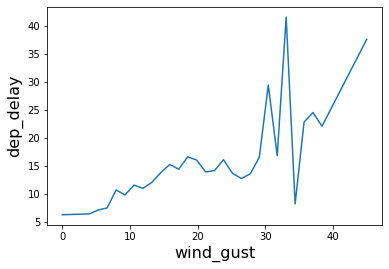

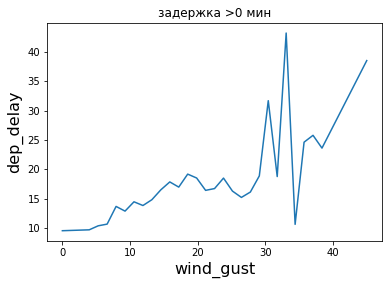

In [295]:
c = np.sort(d['wind_gust'].unique()[np.logical_not(np.isnan(d['wind_gust'].unique()))])
c=np.delete(c,np.where(c>100))
#print(c)
dd=d.drop(d[d.wind_gust >100].index)
b=dd.groupby('wind_gust')['dep_delay'].mean()
ddd=dd.groupby('wind_gust')['1'].sum()
#print(b)
plt.plot(c,b)
plt.xlabel('wind_gust',fontsize=16)
plt.ylabel('dep_delay',fontsize=16)
plt.show()

dd=dd.drop(dd[dd.dep_delay < 0].index)
c = np.sort(dd['wind_gust'].unique()[np.logical_not(np.isnan(dd['wind_gust'].unique()))])
b=dd.groupby('wind_gust')['dep_delay'].sum()/ddd
#print(b)
plt.plot(c,b)
plt.title('задержка >0 мин')
plt.xlabel('wind_gust',fontsize=16)
plt.ylabel('dep_delay',fontsize=16)
plt.show()

и тут разочарование

3)Посмотрим какой в каком аэропорту задержки самые долгие.

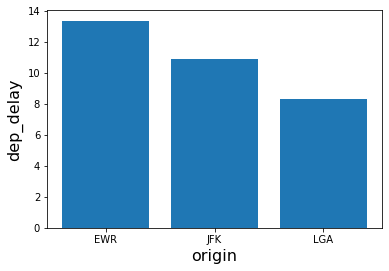

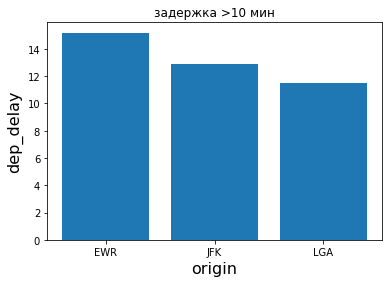

In [297]:
#print(d.head())
#print(d.shape)
#print(d.columns)
c = np.sort(d['origin_x'].unique())
#print(c)
b=d.groupby('origin_x')['dep_delay'].mean()
ddd=d.groupby('origin_x')['1'].sum()
#print(b)
#print(b.shape)
plt.bar(c,b)
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('origin',fontsize=16)
plt.show()

dd=d.drop(d[d.dep_delay < 10].index)
#print(dd.head)
b=dd.groupby('origin_x')['dep_delay'].sum()/ddd
#print(b)
plt.bar(c,b)
plt.title('задержка >10 мин')
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('origin',fontsize=16)
plt.show()

По двум графикам видно,что средняя задержка рейсов в аэропорте EWR больше,и стоит ,к примеру, уменьшить поток самолётов через него.

4)Посмотрим на зависимость от видимости.

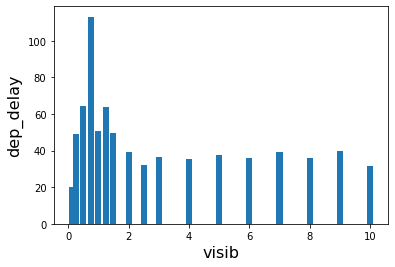

In [298]:
dd=d.drop(d[d.dep_delay < 0].index)
c = np.sort(dd['visib'].unique())
b=dd.groupby('visib')['dep_delay'].mean()
#print(b)
plt.bar(c,b,width=0.2)
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('visib',fontsize=16)
plt.show()

Полезная информация для информирования пассажиров (сколько в среднем необходимо времени для улучшения видимости).

5)Посмотрим у какой авиакомпании задержки самые долгие.

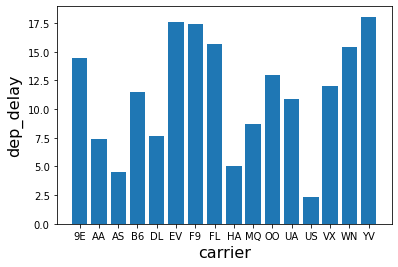

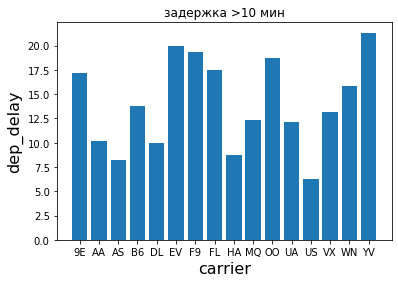

In [299]:
c = np.sort(d['carrier'].unique())
#print(c)
b=d.groupby('carrier')['dep_delay'].mean()
#print(b)
#print(b.shape)
plt.bar(c,b)
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('carrier',fontsize=16)
plt.show()

ddd=d.groupby('carrier')['1'].sum()
dd=d.drop(d[d.dep_delay < 10].index)
#print(dd.head)
b=dd.groupby('carrier')['dep_delay'].sum()/ddd
#print(b)
plt.bar(c,b)
plt.title('задержка >10 мин')
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('carrier',fontsize=16)
plt.show()

Полезно при выборе авиаперевозчика.

6)Посмотрим в какие часы чаще всего задерживают рейсы.

<function matplotlib.pyplot.show(*args, **kw)>

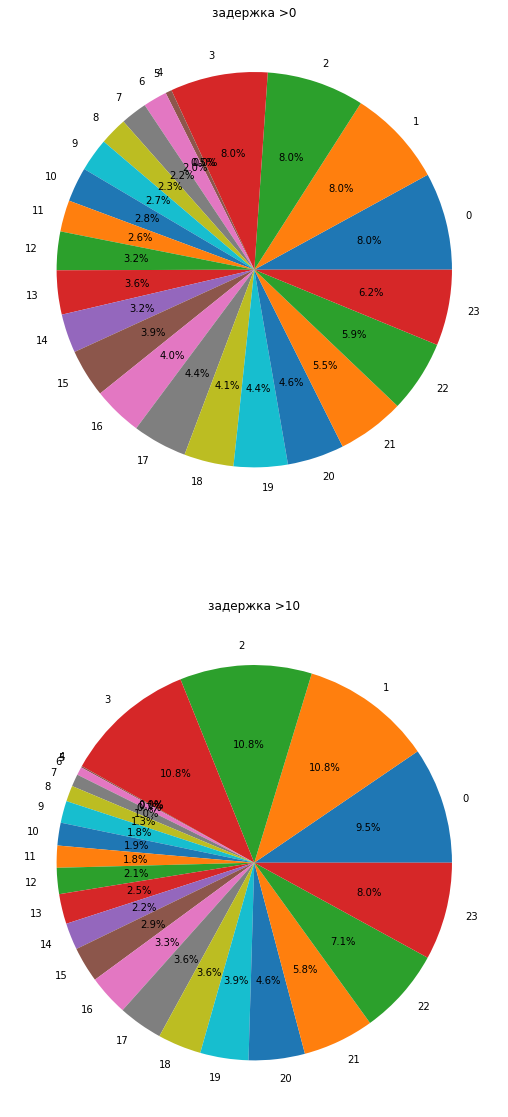

In [325]:
a=np.zeros(24)
aa=np.zeros(24)
с=np.arange(24)
db=d.groupby('hour')['1'].sum()
#np.delete(db, 0)
#print(db)
d.groupby('hour')['1'].sum()
dd=d.drop(d[d.dep_delay < 0].index)
ddd=d.drop(d[d.dep_delay < 10].index)
dd=dd.groupby('hour')['1'].sum()
#print(dd)
ddd=ddd.groupby('hour')['1'].sum()
#print(ddd)
a=dd/db
a=a.fillna(0)
#print(a)
aa=ddd/db
aa=aa.fillna(0)
#print(aa)

fig, axes = plt.subplots(nrows = 2, ncols =1 )
axes[0].set(title='задержка >0')
axes[0].pie(a,labels=с,autopct='%1.1f%%')
axes[1].set(title='задержка >10')
axes[1].pie(aa,labels=с,autopct='%1.1f%%')
fig.set_figwidth(12)
fig.set_figheight(20) 
plt.show



Итак,самое "проблемное" время c 00 до 03.Что вообще довольно странно.Получается,что с 1 до 3 все задержи были > 10 мин.

7)Посмотрим на зависимость длины задержек от продолжительности полёта.

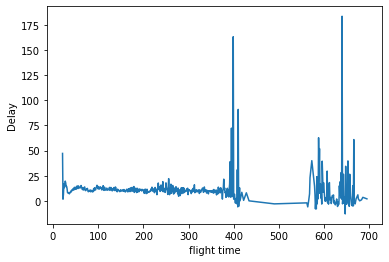

In [331]:
c = np.sort(d['air_time'].unique())
dd=d.groupby('air_time')['dep_delay'].mean()
plt.plot(c,dd)
plt.xlabel('flight time')
plt.ylabel('Delay')
plt.show()

В целом,при особо длительных перелётах,задержка рейсов немного увеличивается.

8) Исследуем зависимость числа задержек более 10 минут от месяц:

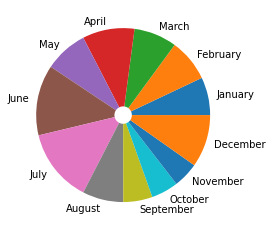

In [333]:
ddd=d.groupby('month')['1'].sum()
dd=d.drop(d[d.dep_delay < 10].index)
dd=dd.groupby('month')['dep_delay'].sum()/ddd
plt.pie(dd,labels=['January','February','March','April','May','June','July','August','September','October','November','December'],wedgeprops=dict(width=0.9))
plt.show()

В весенние и летние месяцы частота задержек (более 10 мин) выше,соответсвенно ,в это время года стоит нанимать больше рабочих, для того чтобы не было проблем с обслуживанием в аэропортах.

9) Исследуем зависимость длины задержек (>10 мин) от температуры

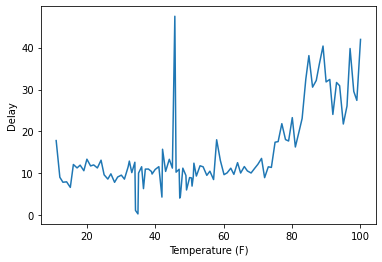

In [334]:
c = np.sort(d['temp'].unique())
ddd=d.groupby('temp')['1'].sum()
dd=d.drop(d[d.dep_delay < 10].index)
dd=dd.groupby('temp')['dep_delay'].sum()/ddd
plt.plot(c,dd)
plt.xlabel('Temperature (F)')
plt.ylabel('Delay')
plt.show()

Удивительно,но это 1 хоть какая-то внятная зависимость.Авиаперевозчикам стоит задуматься : в чём причина роста времени задержек(непонятно на что температура так влияет : на технику или людей).

10) Исследуем зависимость длительности задержек от дня месяца.

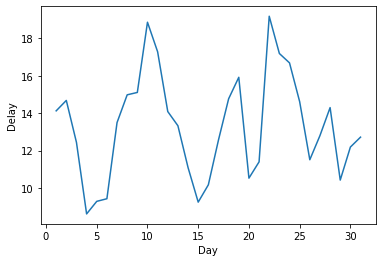

In [335]:
c = np.sort(d['day'].unique())
ddd=d.groupby('day')['1'].sum()
dd=d.drop(d[d.dep_delay < 10].index)
dd=dd.groupby('day')['dep_delay'].sum()/ddd
plt.plot(c,dd)
plt.xlabel('Day')
plt.ylabel('Delay')
plt.show()

Пожалуй,это была плохая идея.